# Problem 0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
N_steps = 10000    # number of steps in the walk
N_trials = 5000   # number of independent trials

In [ ]:
# simulate random steps by +1 for right and -1 for left
steps = np.random.choice([-1, 1], size=(N_trials, N_steps))

In [ ]:
# compute position after each step
displacement = np.cumsum(steps, axis=1)

In [ ]:
# RMS displacement = sqrt(average(Xn^2) over trials)
rms_displacement = np.sqrt(np.mean(displacement**2, axis=0))

In [ ]:
#Theoretical RMS = sqrt(N)
n = np.arange(1, N_steps + 1)
rms_theory = np.sqrt(n)

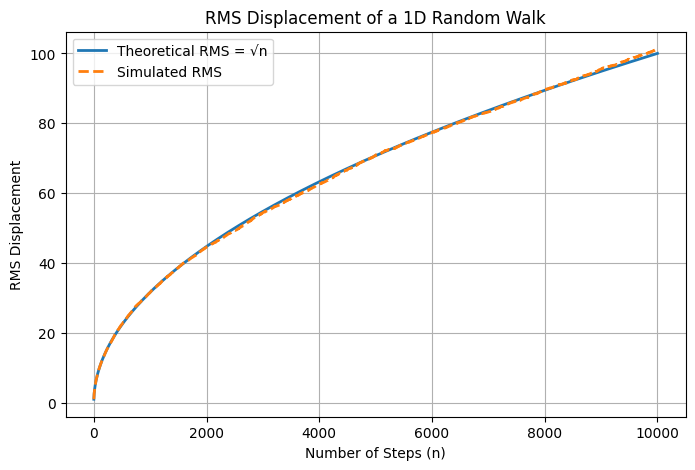

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(n, rms_theory, label="Theoretical RMS = √n", linewidth=2)
plt.plot(n, rms_displacement, '--', label="Simulated RMS", linewidth=2)
plt.xlabel("Number of Steps (n)")
plt.ylabel("RMS Displacement")
plt.title("RMS Displacement of a 1D Random Walk")
plt.legend()
plt.grid(True)
plt.show()

In [113]:
def classical_walk(t_max):
    # state: position -> probability
    state = {0: 1.0}   # Start at x=0 with probability 1
    state_history = [state]

    for t in range(t_max):
        new_state = {}
        for x, p in state.items():
            left_pos = x - 1
            right_pos = x + 1

            # Each step splits probability in half
            new_state[left_pos] = new_state.get(left_pos, 0) + p/2
            new_state[right_pos] = new_state.get(right_pos, 0) + p/2

        state = new_state
        state_history.append(state)

    return state_history

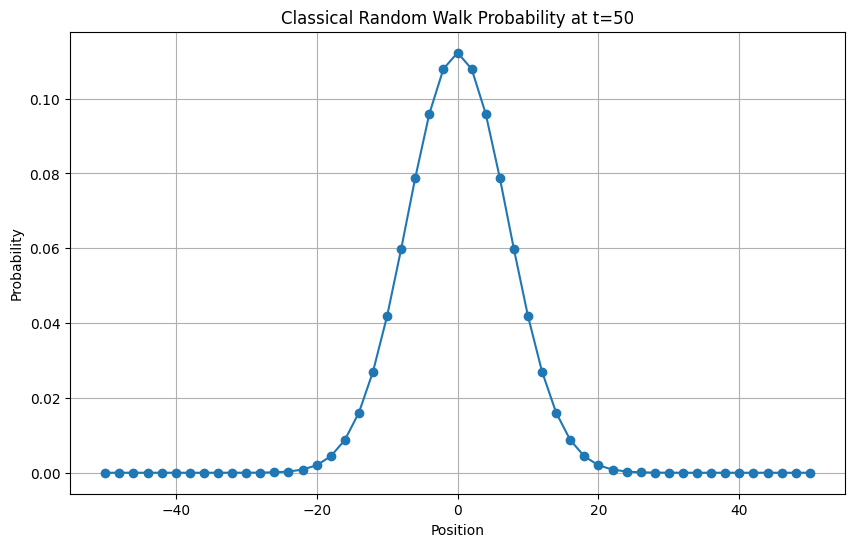

In [114]:
t = 50
classical_states = classical_walk(t)
state_t = classical_states[-1]

positions = np.array(sorted(state_t.keys()))
probs = np.array([state_t[x] for x in positions])

plt.figure(figsize=(10,6))
plt.plot(positions, probs, marker='o')
plt.title(f"Classical Random Walk Probability at t={t}")
plt.xlabel("Position")
plt.ylabel("Probability")
plt.grid(True)
plt.show()

# Problem 1

In [ ]:
import matplotlib.pyplot as plt

def quantum_walk_pauli_x(steps):
    # position of Bob
    position = 0
    # coin state: 0 means |0>, 1 means |1>
    coin = 0

    positions = [position]  # store positions step-by-step

    for _ in range(steps):
        # 1. Apply X gate → flip coin
        coin = 1 - coin

        # 2. Shift depending on coin value
        if coin == 0:
            position -= 1   # move left
        else:
            position += 1   # move right

        positions.append(position)

    return positions

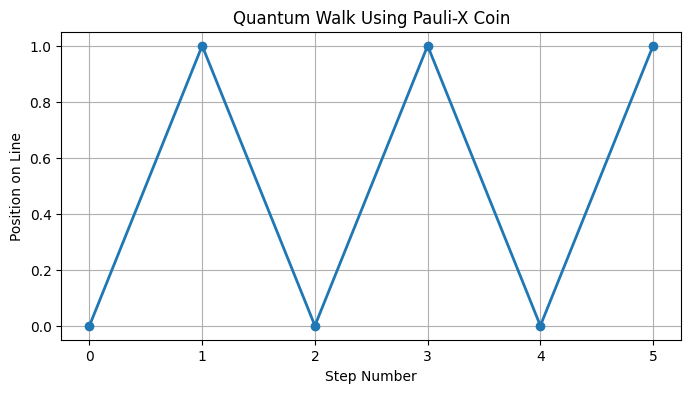

In [ ]:
steps = 5
positions = quantum_walk_pauli_x(steps)

# ---- Plot ----
plt.figure(figsize=(8, 4))
plt.plot(range(steps + 1), positions, marker='o', linewidth=2)
plt.title("Quantum Walk Using Pauli-X Coin")
plt.xlabel("Step Number")
plt.ylabel("Position on Line")
plt.grid(True)
plt.show()

# Problem 2

In [106]:
# Hadamard gate
H = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

def quantum_walk_all(t_max):
    # state_history[t] = state at time t
    state = {0: np.array([1, 0], dtype=complex)}
    state_history = [state]

    for t in range(t_max):
        new_state = {}
        for x, qubit in state.items():
            qubit_h = H @ qubit

            left_pos = x - 1
            new_state[left_pos] = new_state.get(left_pos, np.array([0,0],dtype=complex)) + np.array([qubit_h[0], 0])

            right_pos = x + 1
            new_state[right_pos] = new_state.get(right_pos, np.array([0,0],dtype=complex)) + np.array([0, qubit_h[1]])

        state = new_state
        state_history.append(state)

    return state_history

In [107]:
def rms(state):
    positions = np.array(list(state.keys()))
    probs = np.array([np.abs(state[x][0])**2 + np.abs(state[x][1])**2 for x in positions])
    return np.sqrt(np.sum(positions**2 * probs))

In [108]:
t_max = 50
states = quantum_walk_all(t_max)
t_values = np.arange(t_max + 1)
rms_actual = [rms(state) for state in states]

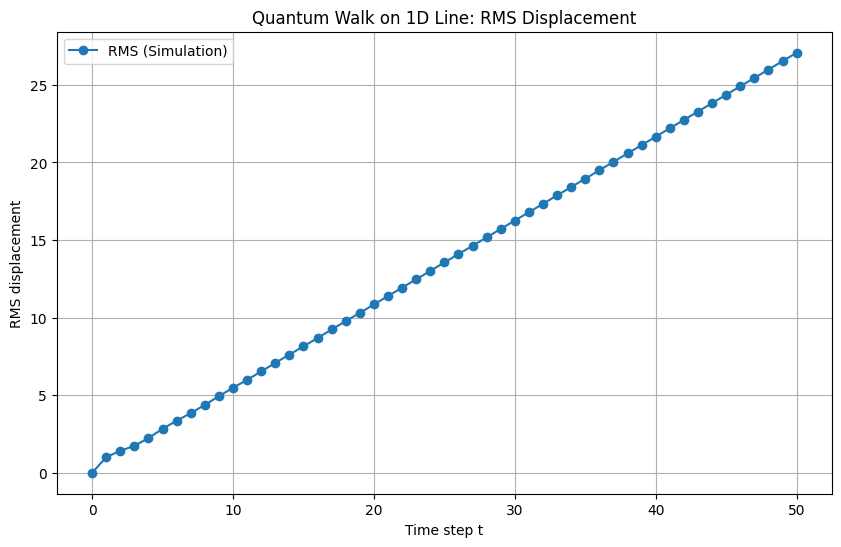

In [110]:
plt.figure(figsize=(10,6))
plt.plot(t_values, rms_actual, 'o-', label='RMS (Simulation)')
plt.xlabel('Time step t')
plt.ylabel('RMS displacement')
plt.title('Quantum Walk on 1D Line: RMS Displacement')
plt.legend()
plt.grid(True)
plt.show()

In [111]:
state_50 = states[50]
positions = np.array(sorted(state_50.keys()))
probs = np.array([np.abs(state_50[x][0])**2 + np.abs(state_50[x][1])**2 for x in positions])
probs /= np.sum(probs)

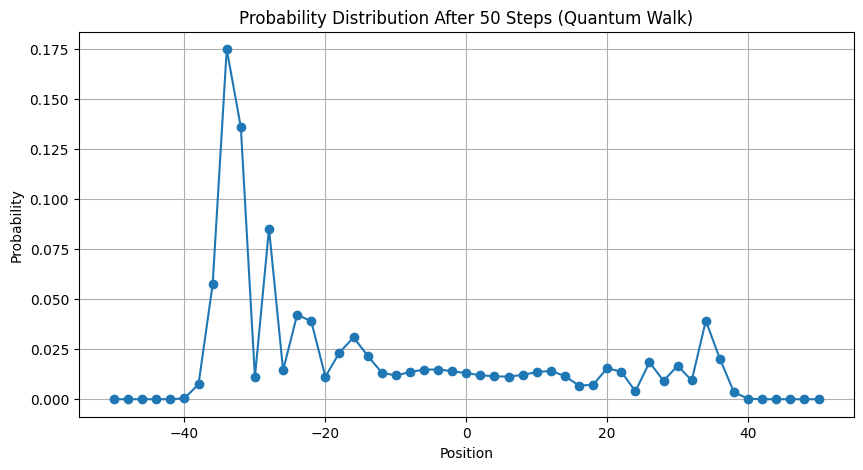

In [112]:
plt.figure(figsize=(10,5))
plt.plot(positions, probs, marker='o')
plt.xlabel("Position")
plt.ylabel("Probability")
plt.title("Probability Distribution After 50 Steps (Quantum Walk)")
plt.grid(True)
plt.show()